In [26]:
#List of Kernels in SVM
#1. Linear Kernel
#2. Polynomial Kernel
#3. Radial Basis Function (RBF) Kernel ##Best Results for non-linear data
#4. Sigmoid Kernel

In [42]:
#Make circle dataset
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100, noise=0.3, factor=0.1, random_state=42)

In [43]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

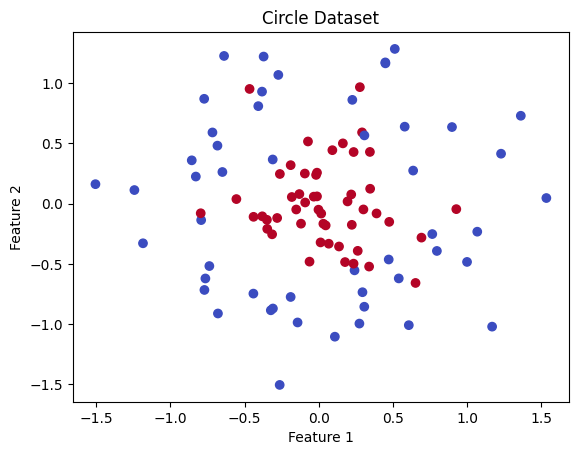

In [44]:
#Plot the dataset
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title('Circle Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [45]:
#Try using SVM with linear kernel to fit the data
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
#Predicting the test set results
y_pred = model.predict(X_test)

In [46]:
#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with linear kernel: {accuracy*100:.2f}%')

Accuracy with linear kernel: 30.00%


In [47]:
#Using rbf kernel to fit the data
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train, y_train)
#Predicting the test set results
y_pred_rbf = model_rbf.predict(X_test)

In [48]:
#Accuracy Score for rbf kernel
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f'Accuracy with RBF kernel: {accuracy_rbf*100:.2f}%')

Accuracy with RBF kernel: 90.00%


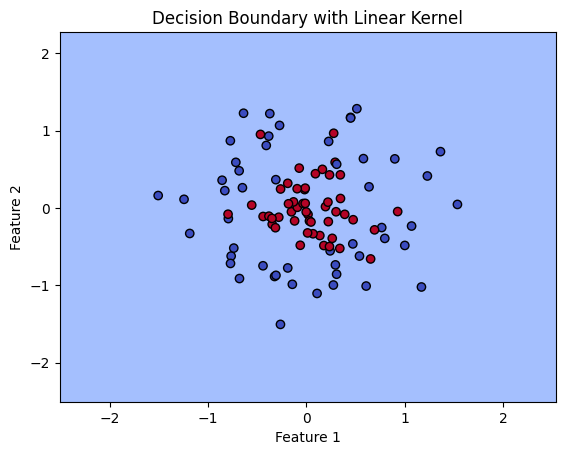

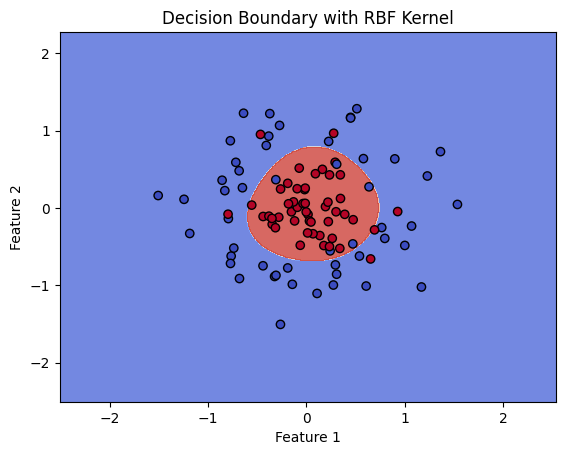

In [49]:
#Plotting decision boundaries for both models
def plot_decision_boundary(model, X, y, title):
    import numpy as np
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
plot_decision_boundary(model, X, y, 'Decision Boundary with Linear Kernel')
plot_decision_boundary(model_rbf, X, y, 'Decision Boundary with RBF Kernel')
